In [1]:
#importingLibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#checking shape
df.shape

(32560, 15)

There are 32560 rows and 15 columns in dataset

In [4]:
#checking the datatype of each column 
print(df.dtypes)

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object


Age,fnlwgt,Education num,capital gain ,capital loss,hours per week are of integer type
Rest are object type data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#Checking for unique values in each columns
df.apply(lambda x:len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [9]:
#extracting object type
cat=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="object":
        cat.append(x)

In [10]:
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [11]:
#checking the value couts in all the object type variable
for col in cat:
    print(col)
    print(df[col].value_counts())
    print()

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Occupation
 Prof-specialty      

# Exploratory Data Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

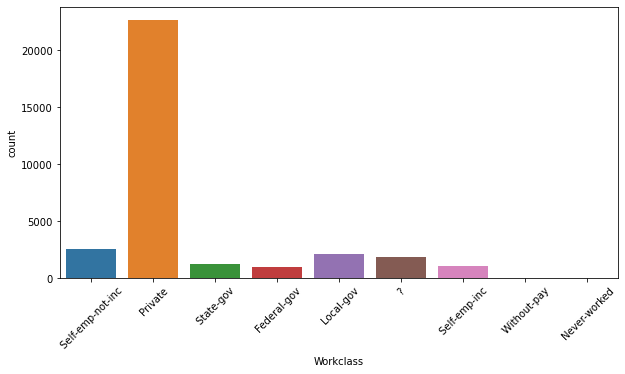

In [12]:
#Workclass
plt.figure(figsize=(10,5))
sns.countplot("Workclass", data=df)
plt.xticks(rotation=45)

We can see that people working in private are more than 30000 and rest are below 5000.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

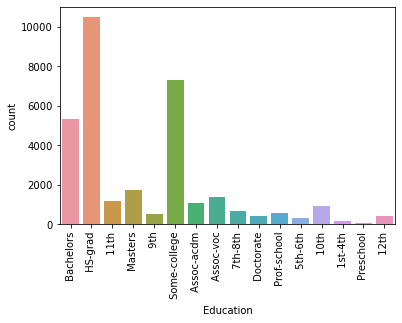

In [13]:
#Education
sns.countplot("Education", data=df)
plt.xticks(rotation=90)

People with HS-grad has very high count, however there are very few people with higher qualification.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

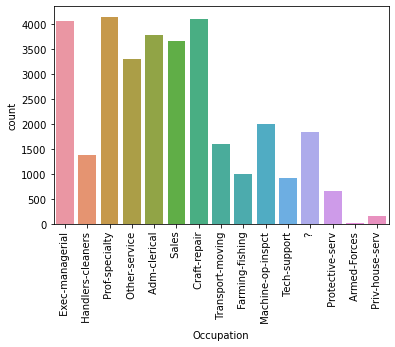

In [14]:
#Occupation
sns.countplot("Occupation", data=df)
plt.xticks(rotation=90)

Exec-managerial, Prof-specialty,Adm-clerical, sales, craft-repair are the most prefered works.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

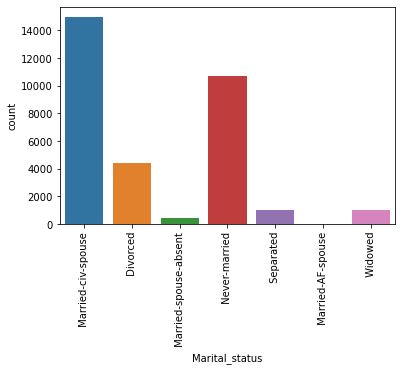

In [15]:
#Marital-status
sns.countplot("Marital_status", data=df)
plt.xticks(rotation=90)

Married civilian spouse are high in count also Never married people are good in numbers.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

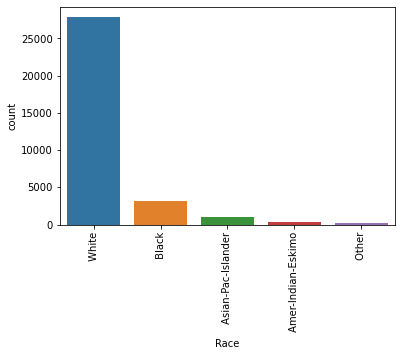

In [16]:
#Race
sns.countplot("Race", data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

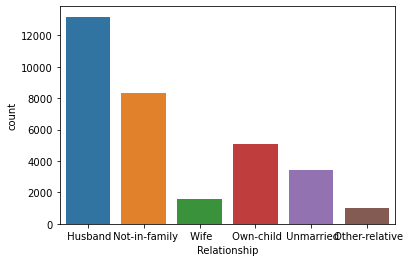

In [17]:
#Relationship
sns.countplot("Relationship", data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

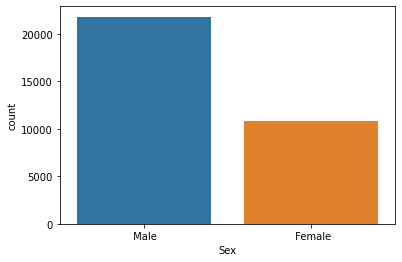

In [18]:
#Sex
sns.countplot("Sex", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

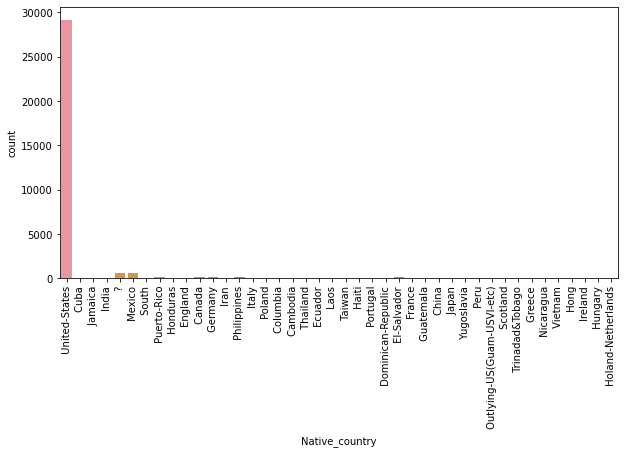

In [19]:
#Native_counry
plt.figure(figsize=(10,5))
sns.countplot("Native_country", data=df)
plt.xticks(rotation=90)

nearly all the people are from united states.

<AxesSubplot:xlabel='Income', ylabel='count'>

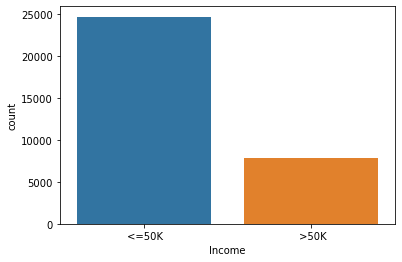

In [20]:
#Income
sns.countplot("Income", data=df)

In [21]:
#extracting flot and int type
ncat=[]
for x in df.dtypes.index:
    if df.dtypes[x]!="object":
        ncat.append(x)

In [22]:
ncat

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [24]:
#creating a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(6,4))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

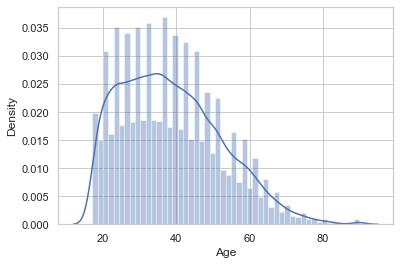

In [25]:
# Age
histogram(df,"Age")

The maximum nuMber of people fallls in the age group of 21 to 45, also there is the pattern that every consecutive age is very high.

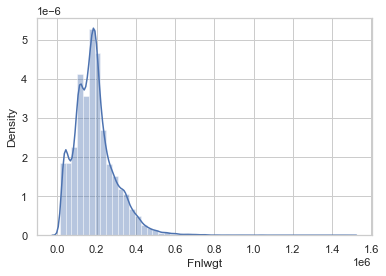

In [26]:
#item Fnlwgt
histogram(df,"Fnlwgt")

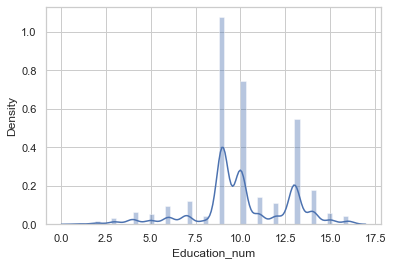

In [27]:
#Education num
histogram(df,"Education_num")

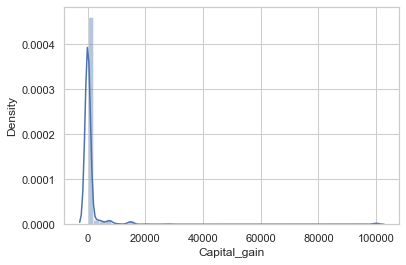

In [28]:
#Capital_gain
histogram(df,"Capital_gain")

Capital gain contain huge outlier.

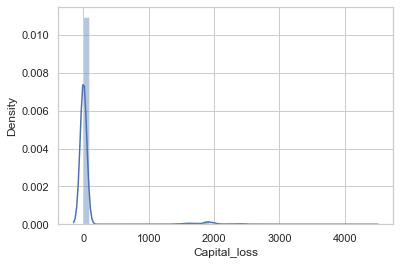

In [29]:
#Capital_loss
histogram(df,"Capital_loss")

Capital loss contain huge outlier.

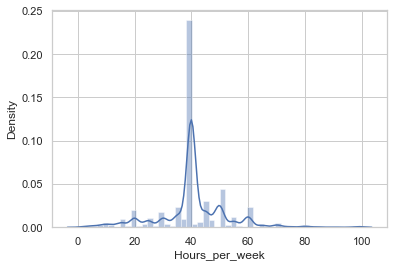

In [30]:
#item Hours per week
histogram(df,"Hours_per_week")

<AxesSubplot:xlabel='Education', ylabel='count'>

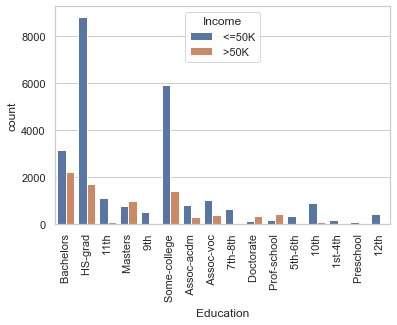

In [31]:
#Education to Income
plt.xticks(rotation=90)
sns.countplot("Education", data=df, hue="Income")

The people with HS-grad and some college experience earn highest. however it is also the case that these groups contains most numbers of people.

<AxesSubplot:xlabel='Sex', ylabel='count'>

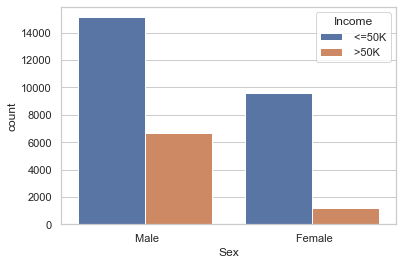

In [32]:
# Sex to Income
sns.countplot(x="Sex",hue="Income",data=df)

Male has more earning than Female in both the category.

<AxesSubplot:xlabel='Workclass', ylabel='count'>

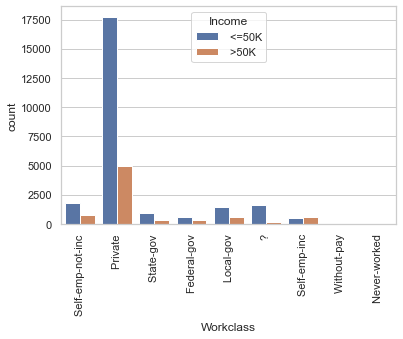

In [33]:
# Workclass to Income
plt.xticks(rotation=90)
sns.countplot(x="Workclass",hue="Income",data=df)

The workclass private has highest income. it contains both the catogery in majority.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

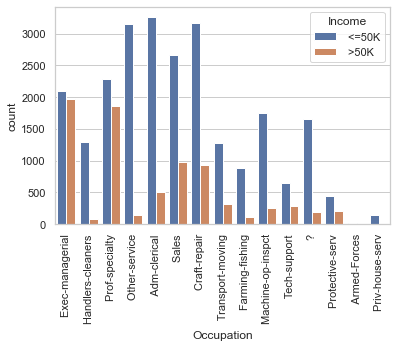

In [34]:
#Occupation to income
plt.xticks(rotation=90)
sns.countplot(x="Occupation",hue="Income",data=df)

The occupation which has highest 50k plus income also has hightest less 50k plus income

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

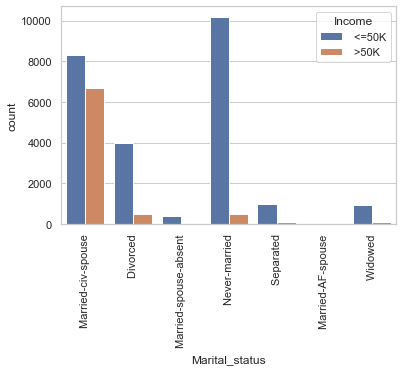

In [35]:
#Marital_status to income
plt.xticks(rotation=90)
sns.countplot(x="Marital_status", hue="Income",data=df)

People who are not married has highest number of 50k plus income.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

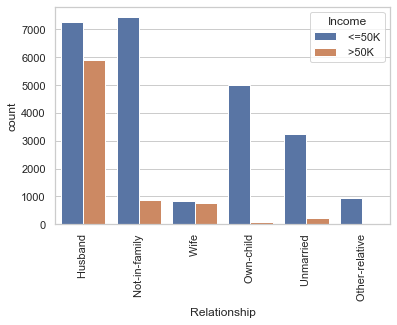

In [36]:
#Relationship to income
plt.xticks(rotation=90)
sns.countplot(x="Relationship", hue="Income", data=df)

The Not in family category peOple has highest 50k plus income with low less 50k plus income.

<AxesSubplot:xlabel='Race', ylabel='count'>

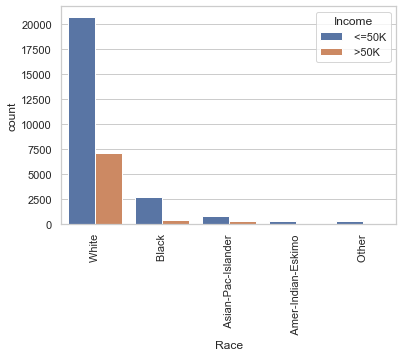

In [37]:
#Race to income
plt.xticks(rotation=90)
sns.countplot(x="Race",  hue="Income",data=df)

The white people has highest income among all category.

<AxesSubplot:xlabel='Native_country', ylabel='count'>

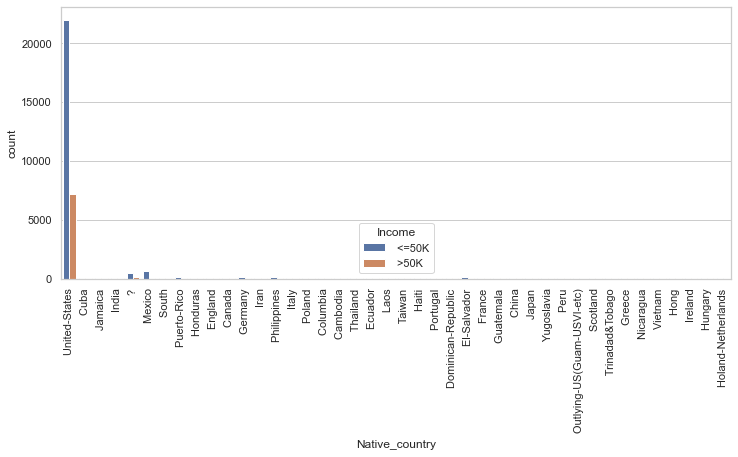

In [38]:
#Native_country to income
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(x="Native_country",  hue="Income",data=df)

People who belongs from united state has earnings apart that every other people from different origIn has approx nill income

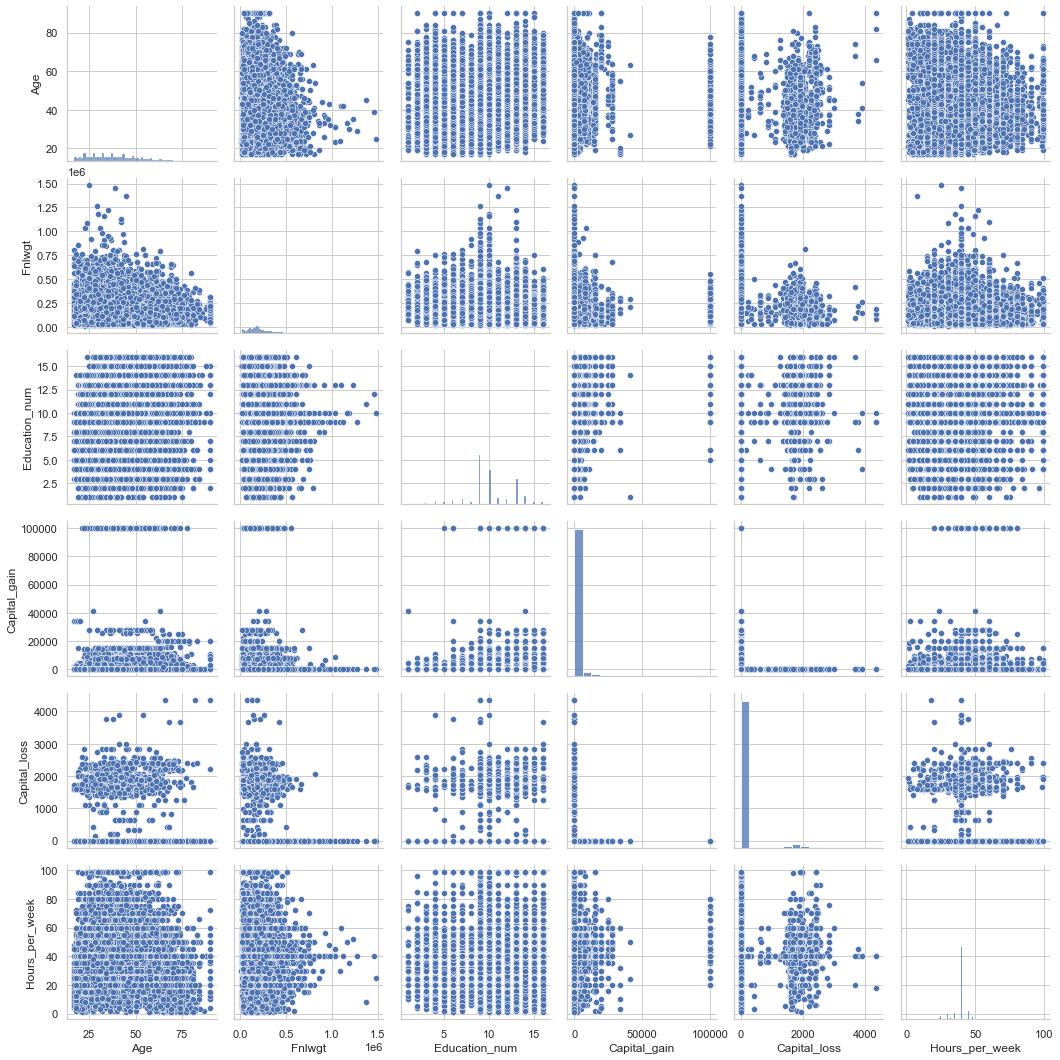

In [39]:
sns.pairplot(df)

# Using Label encoder to convert object type data into integer

In [40]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in df.columns:
    if df[i].dtypes =='object':
        df[i]=le.fit_transform(df[i])

In [41]:
le=LabelEncoder()
list1=["Income"]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [42]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


From the above analysis, we can say that their is a huge difference between min and max in capital gain and capital loss.

# Coorelation

<function matplotlib.pyplot.show(close=None, block=None)>

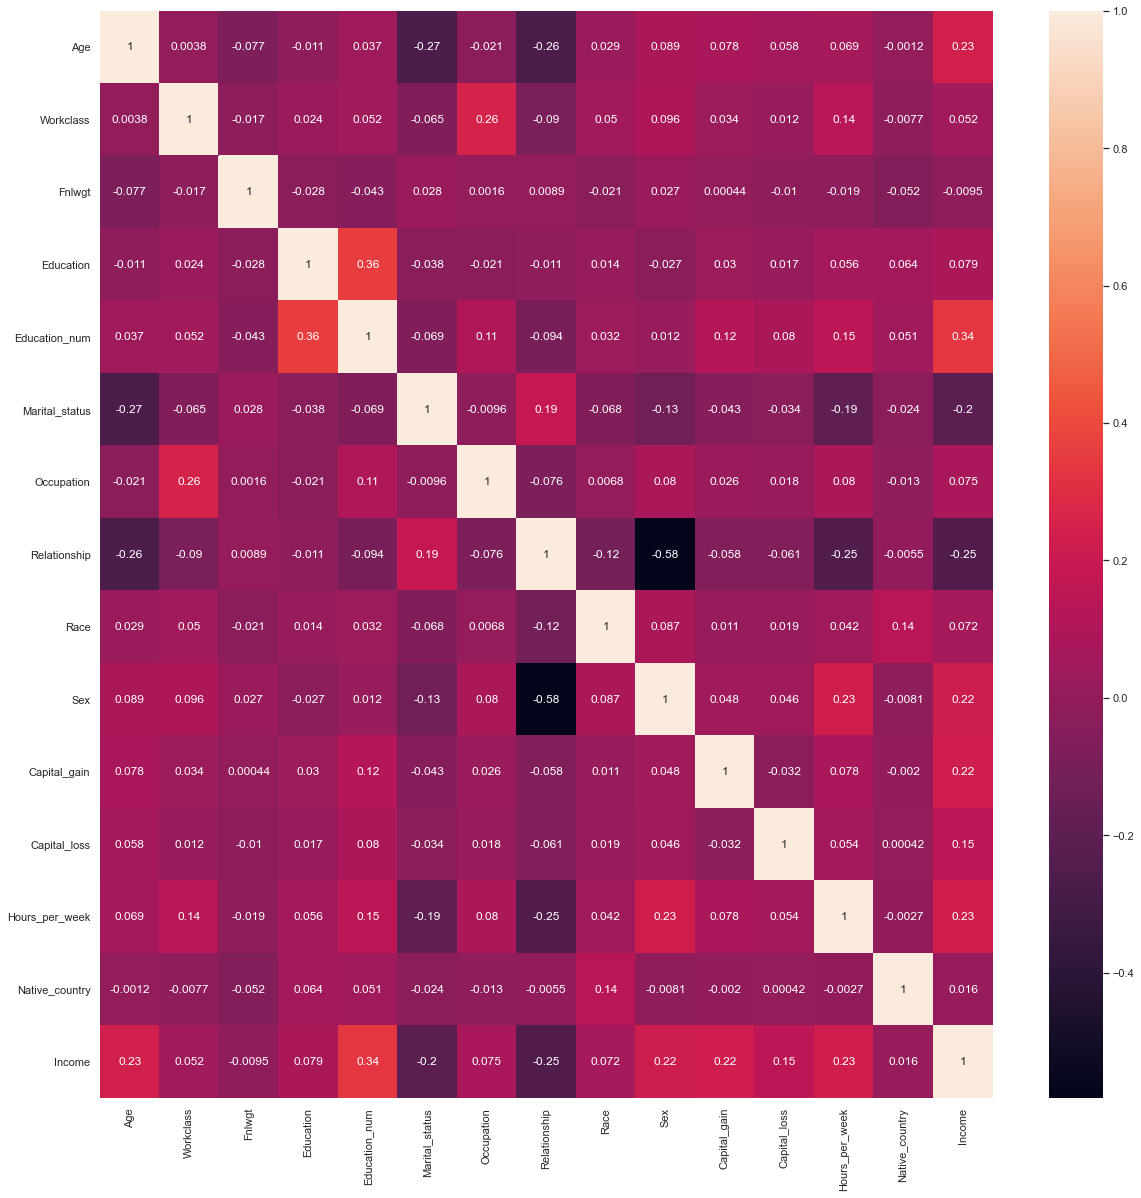

In [43]:
#Observing corelation between the columns through heatmap.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show

From the above observation we can see that Income is Negatively co-related with fnlwgt, marital status and relationship.
Rest are positive.

# Identifying Outliers

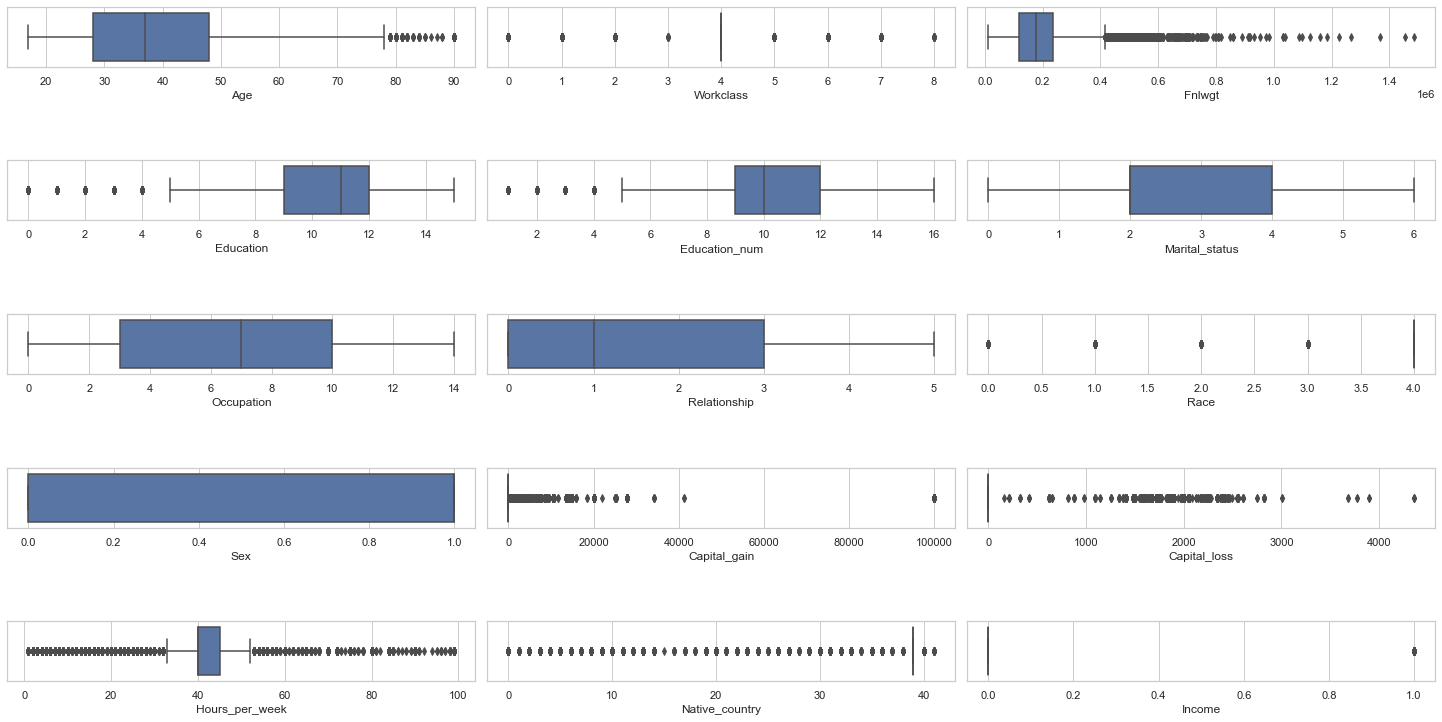

In [44]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=3,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Removing Outliers

In [45]:
print("The shape before removing Outliers and Skewness",df.shape)
print("Skewness before removing Outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("New shape after removing Outliers",df.shape)
print("Skewness after removing Outliers")
print(df.skew())

The shape before removing Outliers and Skewness (32560, 15)
Skewness before removing Outliers
Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64
New shape after removing Outliers (27417, 15)
Skewness after removing Outliers
Age                0.483478
Workclass         -0.738023
Fnlwgt             0.626221
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.750207
Race              -2.592931
Sex               -0.684115
Capital_gain       4.934878
Capital_loss      29.325736
Hours_per_week    -0.358396
Native_country    -5.460675


# Spliting Data into Input and Output Variable

In [46]:
x=df.drop('Income',axis=1)
y=df['Income']

In [47]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
5,49,4,160187,6,5,3,8,1,2,0,0,0,16,23


In [48]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int32

In [49]:
print(x.shape)
print(y.shape)

(27417, 14)
(27417,)


In [50]:
y=y.values.reshape(-1,1)

In [51]:
y.shape

(27417, 1)

In [52]:
# Converting particular columns in between 0 to 1 by using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columns_to_scale=['Age','Education_num','Capital_gain','Capital_loss','Hours_per_week']
x[columns_to_scale]=scaler.fit_transform(x[columns_to_scale])

# Removing Skewness

In [53]:
#Reducing skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [54]:
x.skew()

Age                0.483478
Workclass         -0.738023
Fnlwgt            -0.955594
Education         -0.957458
Education_num     -0.143960
Marital_status    -0.044317
Occupation         0.131148
Relationship       0.252965
Race              -2.592931
Sex               -0.684115
Capital_gain       4.522651
Capital_loss      28.008772
Hours_per_week    -0.358396
Native_country    -5.460675
dtype: float64

# Importing libraries for model building

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [56]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [57]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 89 is 0.8424507658643327


89

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20562, 14)
(20562, 1)
(6855, 14)
(6855, 1)


# To find best parameters using GridSearchCV 

In [59]:
# Logistic Regression
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'penalty': 'l2'}




In [60]:
#KNeighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'n_neighbors': 9}




In [61]:
# Decission Tree Classifier
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'criterion': 'entropy'}




In [62]:
#GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'learning_rate': 0.1, 'n_estimators': 150}




In [63]:
#Random Forest Classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'max_features': 'auto', 'n_estimators': 150}




In [64]:
# Ada Boost Classifier
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)

{'learning_rate': 1, 'n_estimators': 150}




The model score for LogisticRegression() are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.8336980306345733
The cv score is 0.8324399280422892

[[5062  803]
 [ 337  653]]

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5865
           1       0.45      0.66      0.53       990

    accuracy                           0.83      6855
   macro avg       0.69      0.76      0.72      6855
weighted avg       0.87      0.83      0.85      6855



roc_auc_score 0.6930350222568689


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=9) are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.8399708242159009
The cv score is 0.829667876027661

[[4964  662]
 [ 435  794]]

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5626
           1       0.55      0.65      0.59      1229

    accuracy                           0.84      6855
   macro avg       0.73      

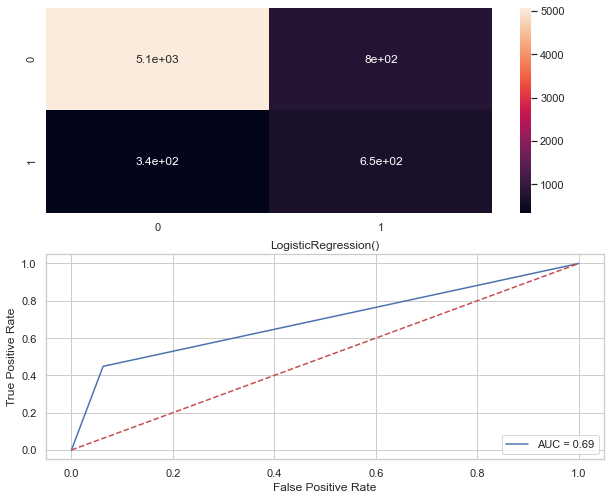

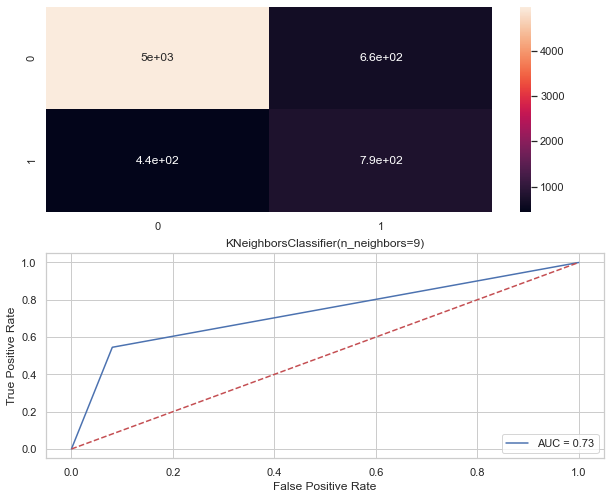

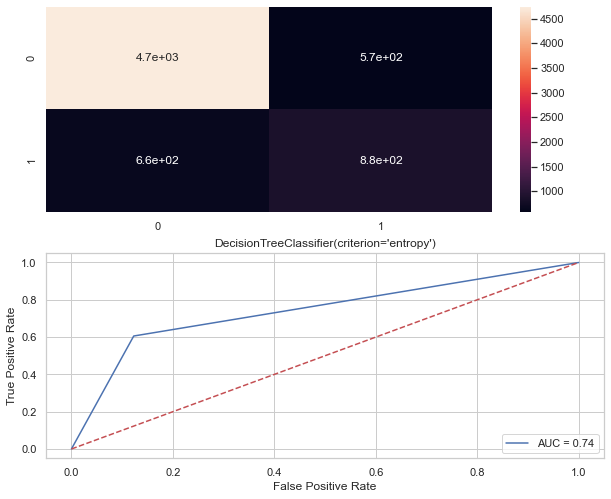

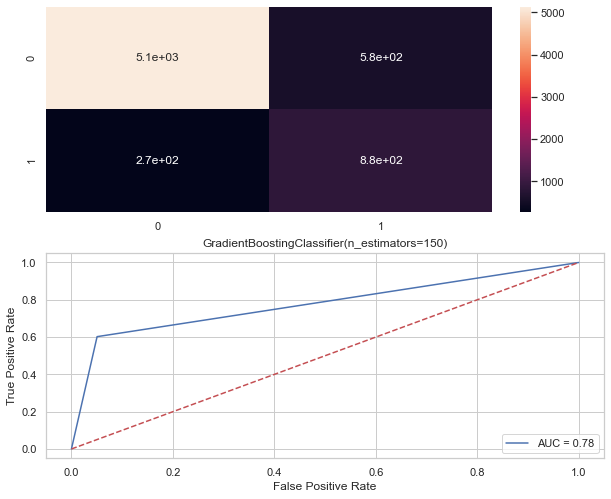

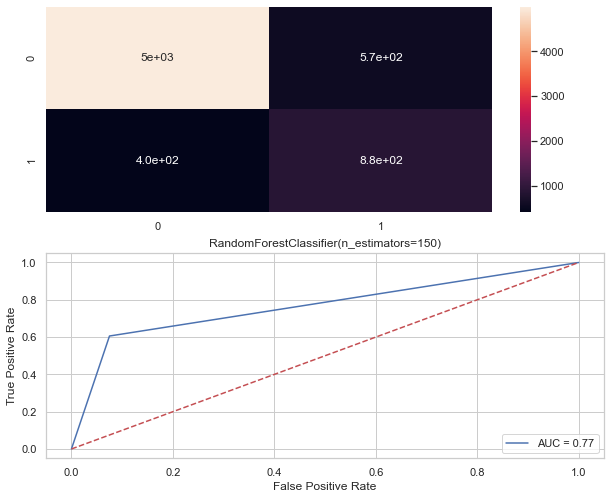

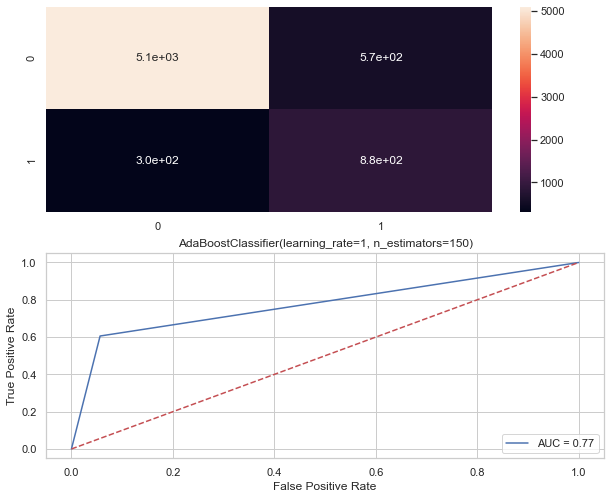

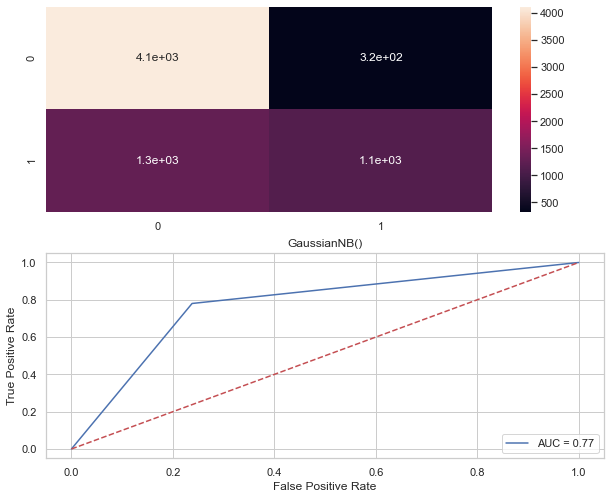

In [65]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=0.1,n_estimators=150),
          RandomForestClassifier(max_features='auto',n_estimators=150),
          AdaBoostClassifier(learning_rate =1, n_estimators = 150),GaussianNB()]:

    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [66]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.833698,0.832440,0.693035
1,KNeighborsClassifier,0.839971,0.829668,0.732380
2,GaussianNB,0.819548,0.810045,0.741484
3,DecisionTreeClassifier,0.875711,0.865886,0.775885
4,GradientBoostingClassifier,0.857185,0.852318,0.765378
5,RandomForestClassifier,0.871772,0.864829,0.774639
6,AdaBoostClassifier,0.766010,0.779516,0.771199


From above DataFrame we can see that Decision Tree Classifier is the best Performing Model.

In [67]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
predict=dtc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8096280087527352
The CV Score = 0.779516363355311
roc_auc_score 0.7341837061808353


# Saving the Model

In [68]:
import joblib
joblib.dump(dtc,"Census_Income_Data.pkl")

['Census_Income_Data.pkl']